In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [17]:
sales = pd.read_csv("data/shampoo_sales.csv")
sales.head()

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [18]:
sales['Month'] = pd.to_datetime(sales['Month'])
sales.set_index('Month', inplace=True)


In [19]:

df = pd.read_csv("data/shampoo_sales.csv", 
                  parse_dates=True, index_col=0)
df.head(36)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


<Axes: xlabel='Month'>

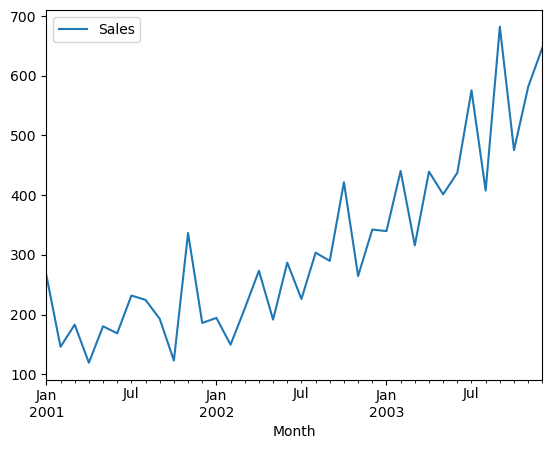

In [20]:
sales.plot()

In [21]:
mean=df['Sales'].mean()
var=df['Sales'].var()
std=df['Sales'].std()



In [22]:
print("global mean:",mean)
print("global std:",std)

global mean: 312.59999999999997
global std: 148.93716412347473


In [23]:
# Number of chunks
num_chunks = 6

# Split into chunks (handles uneven splits)
chunks = np.array_split(df['Sales'], num_chunks)

# Calculate means and standard deviations for each chunk
means = [chunk.mean() for chunk in chunks]
stds = [chunk.std() for chunk in chunks]

# Display the results
for i, (mean, std) in enumerate(zip(means, stds), 1):
    print(f"Chunk {i}: Mean = {mean:.2f}, Std = {std:.2f}")
    

Chunk 1: Mean = 177.18, Std = 49.67
Chunk 2: Mean = 215.73, Std = 70.64
Chunk 3: Mean = 217.60, Std = 52.62
Chunk 4: Mean = 307.98, Std = 67.89
Chunk 5: Mean = 395.67, Std = 55.09
Chunk 6: Mean = 561.43, Std = 103.46


C:\Users\agaan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


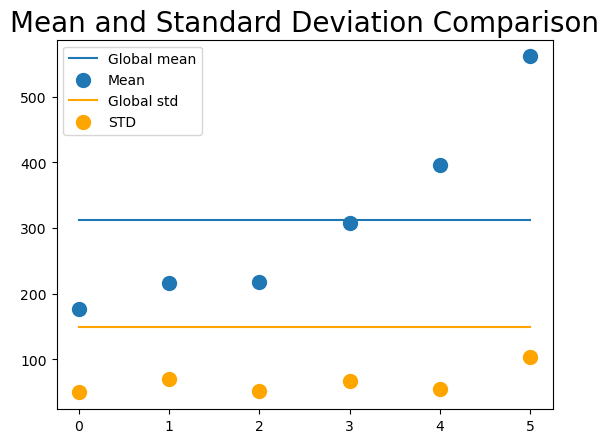

In [24]:
# Plot
plt.title('Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [df.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [df.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

# Create Lags

In [25]:
df['lag1']=df['Sales'].shift(1)
df['lag2'] = df['Sales'].shift(2)
df['lag3'] = df['Sales'].shift(3)
df['lag4'] = df['Sales'].shift(4)
df['lag5'] = df['Sales'].shift(5)

In [26]:
df.head()

,Sales,lag1,lag2,lag3,lag4,lag5
Month,,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN,NaN
2001-02-01,145.9,266.0,NaN,NaN,NaN,NaN
2001-03-01,183.1,145.9,266.0,NaN,NaN,NaN
2001-04-01,119.3,183.1,145.9,266.0,NaN,NaN
2001-05-01,180.3,119.3,183.1,145.9,266.0,NaN


In [27]:
df

,Sales,lag1,lag2,lag3,lag4,lag5
Month,,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN,NaN
2001-02-01,145.9,266.0,NaN,NaN,NaN,NaN
2001-03-01,183.1,145.9,266.0,NaN,NaN,NaN
2001-04-01,119.3,183.1,145.9,266.0,NaN,NaN
2001-05-01,180.3,119.3,183.1,145.9,266.0,NaN
2001-06-01,168.5,180.3,119.3,183.1,145.9,266.0
2001-07-01,231.8,168.5,180.3,119.3,183.1,145.9
2001-08-01,224.5,231.8,168.5,180.3,119.3,183.1
2001-09-01,192.8,224.5,231.8,168.5,180.3,119.3


In [33]:
lags=5
from statsmodels.tsa.stattools import acf
autocorrelations=acf(df['Sales'],nlags=lags)
print(autocorrelations,"\n")


[1.         0.66255777 0.7165448  0.60323689 0.50618008 0.47474817] 



## Plot ACF

In [34]:
from statsmodels.graphics.tsaplots import plot_acf


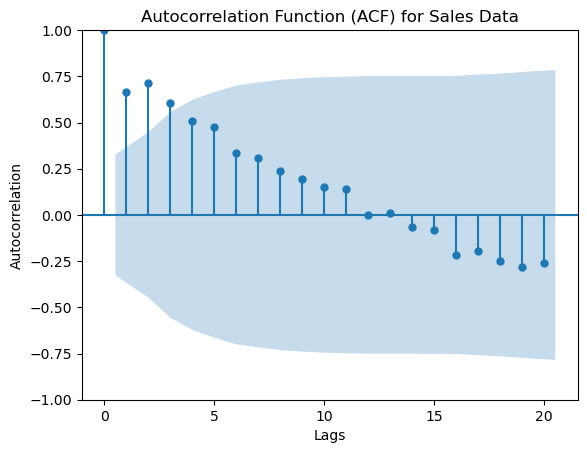

In [36]:
plot_acf(df['Sales'],lags=20)
plt.title('Autocorrelation Function (ACF) for Sales Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()